[Linear Regression](https://colab.research.google.com/drive/1u5UPPuEtwpiD9QYGkJzCw0DsACzoRlMO?authuser=2#scrollTo=aIChY9ovwFhl)

#Gradient Descent

+ Its a first order iterative optimization algorithm for finding a local minimum of diffrenciable function

+ Idea is to take repeated steps in the opposite direction of the gradient of the function at the current point bcoz this is the direction of steepest descent

+ Its an optimization algorithm

+ As we've learned in linear regression optimization we can use OLS method & directly calculate values of m & b but this approach failes when working in multi dimensions bcoz it involves lot of processing & increases time complexity

+ If you give a function which is diffrenciable at all points to gradient descent algortihm, It will return minimum.

+ It works in linear regression, logistic regression, tsne, deep learning

## Intuition

+ There is a dataset with 2 columns
+ cgpa & lpa of 4 students
+ we need to draw a linear regression line or best fit line whose square sum of distance b/w actual & predicted will be minimum using gradient descent

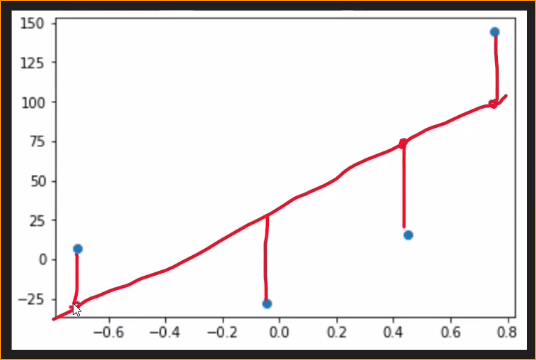

+ Loss function:
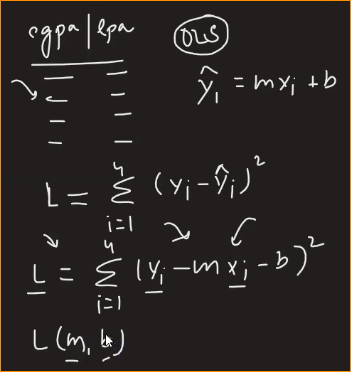

+ loss function completly depends upon m & b bcoz xi & yi values are in data

+ lets assume we already know the value of m so by replacing it in the formula:

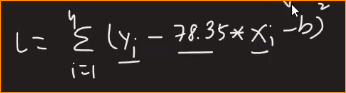

+ lets assume a random line on the graph to find best fit line & since we already know m, we only need to find b. means we can only move the line horizontally & vertically

+ we need a that value of b where loss function value is minmum

+ according to formula, relationship b/w L & b depends upon sqr, and if we draw a graph of this relation then it will look like this:

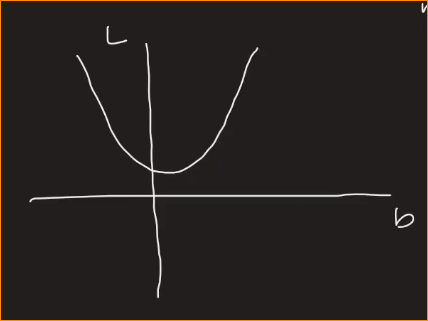

+ graph will be parabolic

+ now we need to find that value of b where value of L (loss function) will be minimum

+ In OLS, we can find the derivative & make it equal to 0 & extract the value of b but we cant apply OLS method since it will have issues in multiple columns, so will use another technique which is called "Gradient Descent"

+ In step1: we'll select a random b

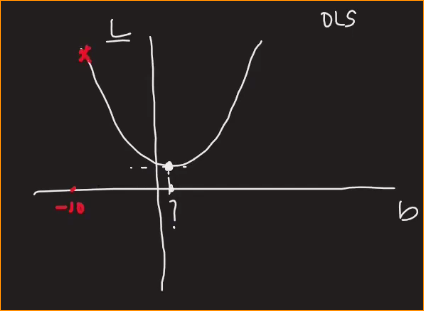

+ Initially value of b is -10 & we need to move towards point b where value of m is minimum.

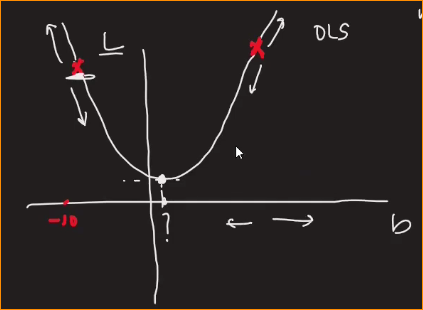

+ visually, we know in what direction to move to get to the point where value of l is minimum but algorithm cant see.. we can either move up or down

+ In RHS, if we decrease b then we move in the right direction but at LHS, f we decrease we'll move away from minimum, so how to know which direction algorithm should move to arrive the minimum.

+ we'll find a slope at the current point, how to find slope of a function at a particular point.

+ slope of a function at x = 5 is 10

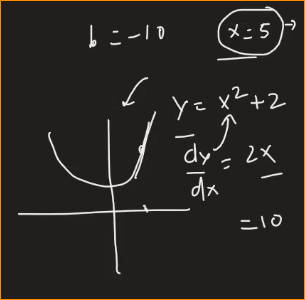


+ find derivate from function equation, you'll get slope & as soon as you put the value of x then you will get the value of slope on that point

+ if slope is-ve then increase value of b & vice versa if +ve

+ **gradientdescent: bnew = bold - slope**

+ -10 - (-50) = 40 means you going far, need to decrease if +ve

+ Thats what the defination says: **"The idea is to take repeated steps in the opposite direction of the gradient which is derivate of the function at the current point bcoz this is the direction of steepest descent"**

+ since the jumps are big, means from 10.. we went directly to 40.. so in order to avoid taaking longer jumps we multiply it with "n" which is called "learning rate" which is generally 0.1

+ bnew = -10 + (0.1*50) = -10 + 0.5 = -9.5, so at -9.5 you will again calculate the slope & keep doing it

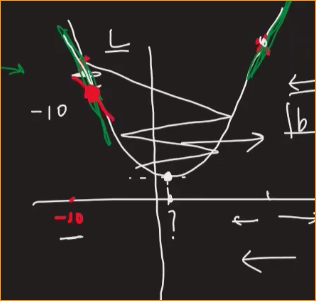

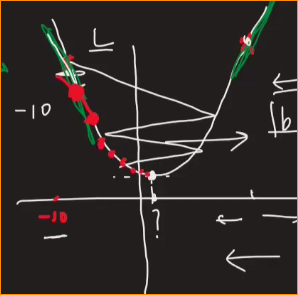

+ if learning rate value is big then you keep moving here & there in +ve & -ve direction but if you keep it very small then you'll move towards right irection very slowly

+ but when to STOP:
  if bnew - bold = becomes very small like 0.00001, then keep the iterations will be of no use bcoz value is already very close to 0, so thats the point where we need to stop or we can set a range of loop like 1000 & we belive that in 1000 times we will arrive at minimum. these iterations are called epochs.



##Mathematical Intuition

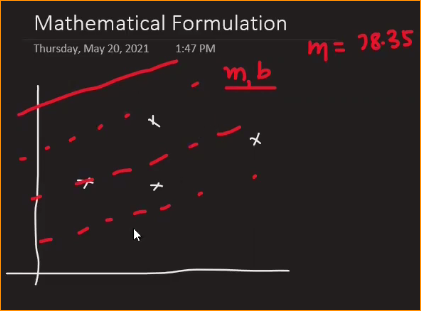

+ we have a dataset & we need to find the best fit line, initially we assume that we already know the value of m & only need to find the value of b

+ stpe 1: start with a random value of b, b = b

+ step2: for i in epochs:
      bnew = bold - n(slope)
      n is learning rate = 0.01 & epochs is the no of iterations

+ To find slope: we'll find derivate of function which is the line equation, lets assume the value of b = 0

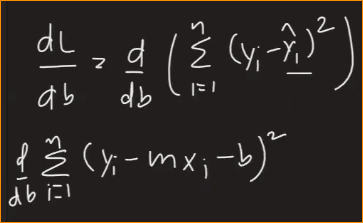

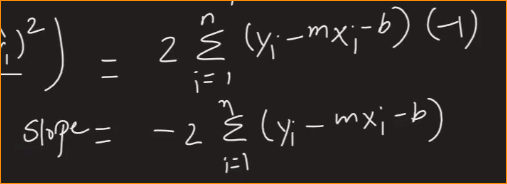

+ replace value of b = 0 & value f m

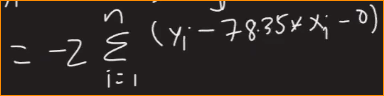


+ we'll get the slop at b = 0 as soon as we replace the value of yi & then we'll increase the iteration epchs to 1 & keep doing it until any one of the 2 condition matches as stated above in where to stop:

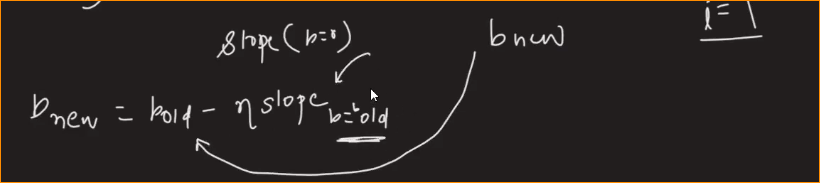






## Code implimentation on dataset

In [2]:
from sklearn.datasets import make_regression
import numpy as np

In [4]:
X,y = make_regression(n_samples = 4, n_features = 1, n_informative = 1,n_targets = 1, noise = 80, random_state = 13)

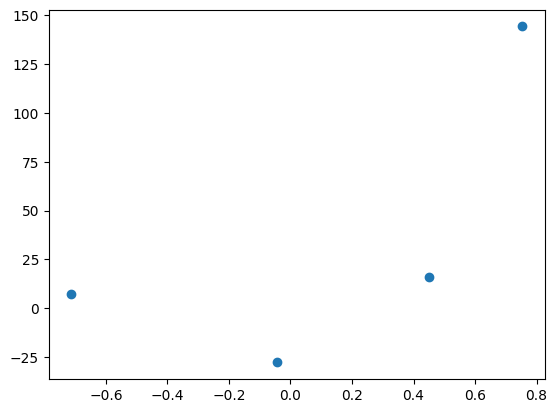

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [10]:
#apply OLS first to get the value of m & b
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [11]:
reg.coef_

array([78.35063668])

In [12]:
reg.intercept_

26.15963284313262

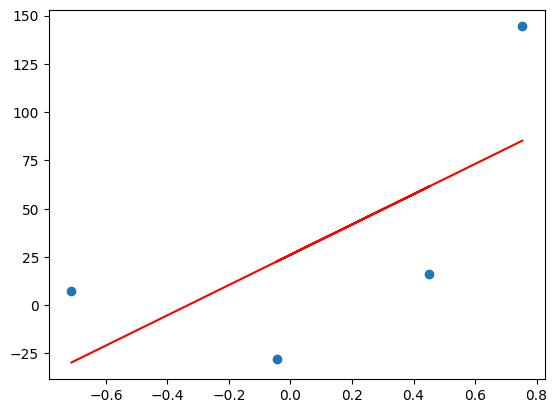

In [17]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color = 'red')

In [18]:
#so we will now right a code where we'll start with a random value
#solwly & gradually by applying gradient descent we'll move closer towards 26.15
#and best fit line will be somewhere closer then the above line

In [19]:
#lets apply gradient descent assuming slope is constant
#slope = 78.35, and starting value of b = 0

#calculating y values to plot this line which is not correct
y_pred = ((78.35 * X)+ 0).reshape(4)

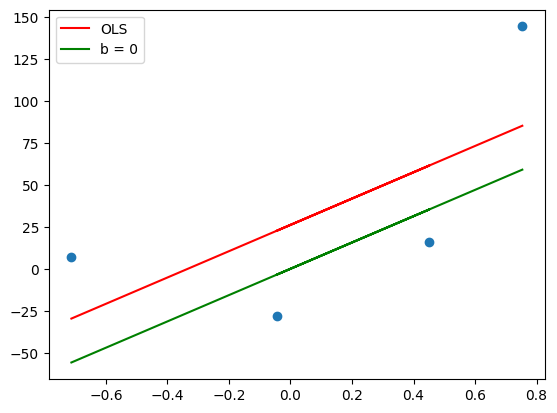

In [21]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color = 'red', label = 'OLS')
plt.plot(X,y_pred, color = 'green', label = 'b = 0')
plt.legend()
plt.show()

In [22]:
m = 78.35
b = 0

+ Applying the value of m & b in this formula:

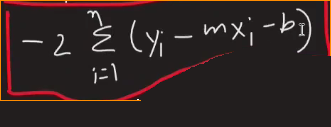

In [23]:
loss_slope = -2 * np.sum(y-m*X.ravel() - b)
loss_slope

-209.27763408209216

In [25]:
#lets assume learning rate = 0.1
lr = 0.1

# n * slope is called step size
step_size = loss_slope * lr
step_size

-20.927763408209216

In [26]:
#calculating new intercept (b)

# bnew = bold - stepsize
b = b - step_size
b

20.927763408209216

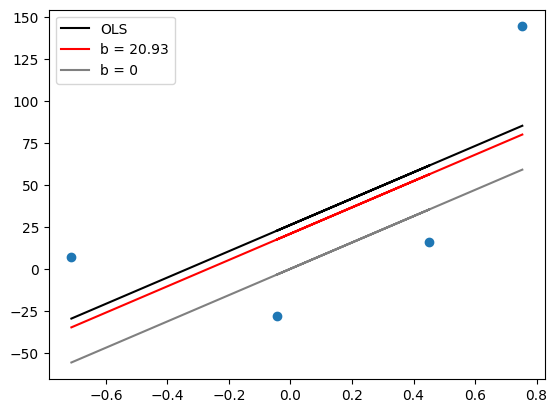

In [32]:
#lets plot the new best fit line
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X), color = 'black', label = 'OLS')
plt.plot(X,y_pred1, color = 'red', label = f'b = {round(b,2)}')
plt.plot(X,y_pred, color = 'grey', label = 'b = 0')
plt.legend()
plt.show()

In [34]:
#iteration 2
#with updated value of b which is 20.927763408209216

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [35]:
#stepsize
step_size = loss_slope * lr
step_size

-4.185552681641844

In [36]:
#new value of b
b = b - step_size
b

25.11331608985106

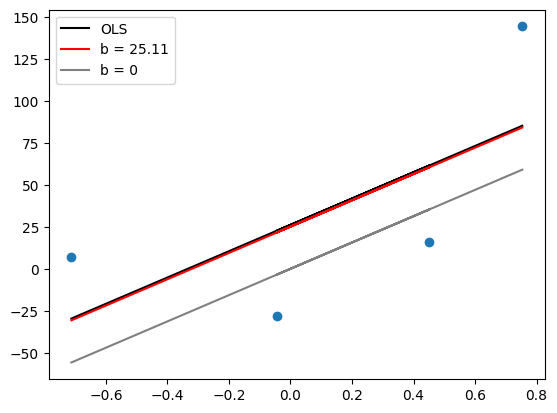

In [37]:
#lets plot the new best fit line
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X), color = 'black', label = 'OLS')
plt.plot(X,y_pred2, color = 'red', label = f'b = {round(b,2)}')
plt.plot(X,y_pred, color = 'grey', label = 'b = 0')
plt.legend()
plt.show()

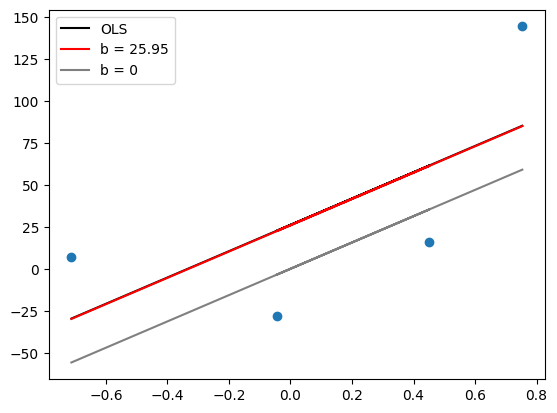

In [38]:
#lets do 1 more iteration

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

#stepsize
step_size = loss_slope * lr
step_size

#new value of b
b = b - step_size
b

#lets plot the new best fit line
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X), color = 'black', label = 'OLS')
plt.plot(X,y_pred3, color = 'red', label = f'b = {round(b,2)}')
plt.plot(X,y_pred, color = 'grey', label = 'b = 0')
plt.legend()
plt.show()

##Best fit line in all 3 iterations:

+ 1st iteration

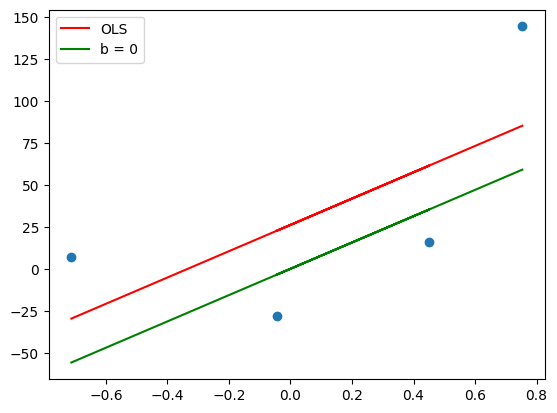



+ 2nd Iteration

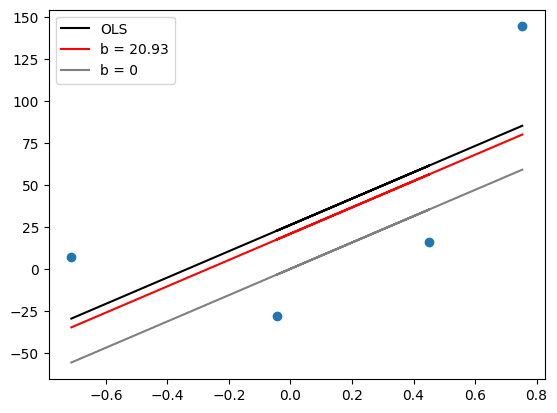




+ 3rd iteration

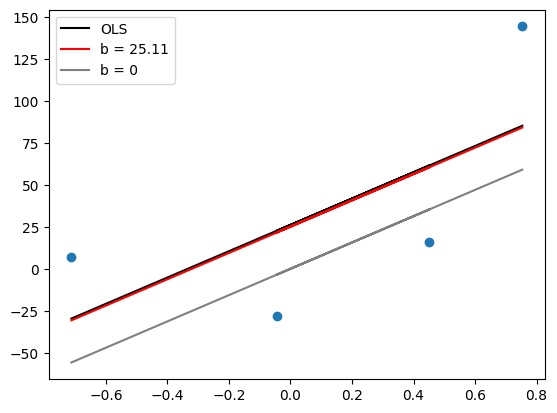








+ 4th iteration

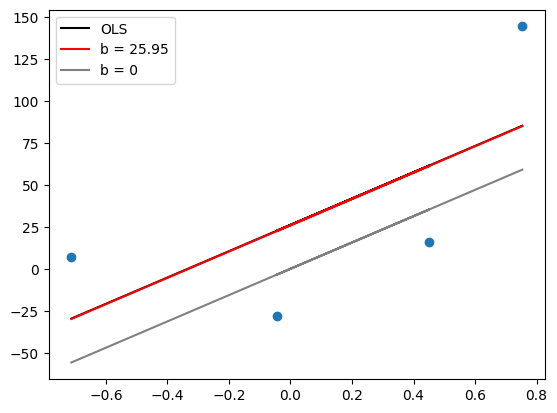


+ As we can notice, in 4th iteration best fit line is almost on top of that red line even though we started with the wrong point

##Lets make a loop of iterations

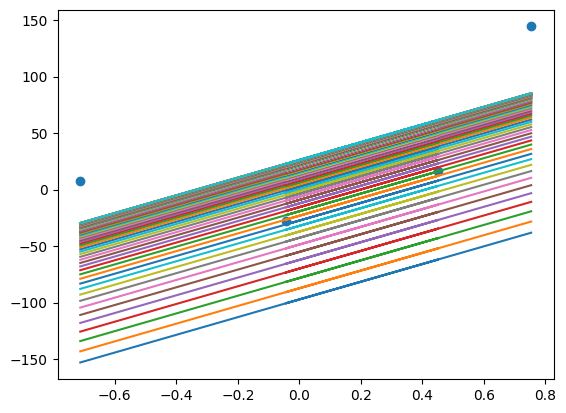

In [46]:
b = -108
m = 78.35
lr = 0.01

epochs = 100

#play with above params to understand the effect of changing lr & epochs

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m*X + b
  plt.plot(X,y_pred)


plt.scatter(X,y)

##Gradient Descent class

In [63]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

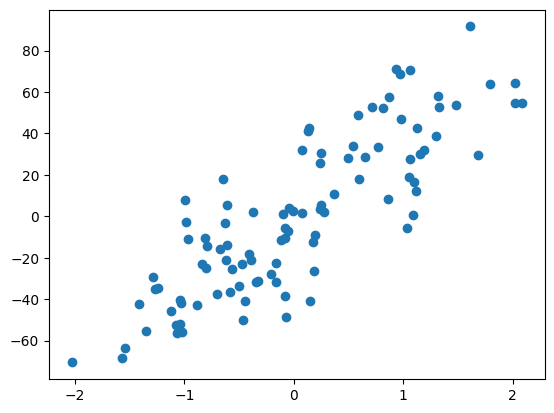

In [64]:
X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20)
plt.scatter(X,y)

In [65]:
# lets fetch actual vaues of m&b by applying linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [66]:
lr.fit(X,y)

LinearRegression()

In [67]:
lr.coef_

array([34.38937094])

In [68]:
lr.intercept_

-0.92548333136937

In [69]:
#lets assume we already the value of m for gradient descent
#(value of m is as per campusx)
m = 29.19

In [70]:
class GRD():
  def __init__(self, lr, epochs):
    self.m = 29.19
    self.b = -120
    self.lr = lr
    self.epochs = epochs

  def fit(self,X,y):
    #calculate b using gd
    for i in range(self.epochs):
      loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)

      self.b = self.b - (self.lr * loss_slope)
      print(loss_slope, self.b)
    print(self.b)

In [71]:
gd = GRD(0.01, 10)
gd.fit(X,y)

-23850.000652227056 118.50000652227055
23850.000652227052 -119.99999999999997
-23850.000652227045 118.5000065222705
23850.00065222704 -119.99999999999991
-23850.000652227038 118.50000652227047
23850.000652227038 -119.99999999999991
-23850.000652227038 118.50000652227047
23850.000652227038 -119.99999999999991
-23850.000652227038 118.50000652227047
23850.000652227038 -119.99999999999991
-119.99999999999991


+ whats hppending with above is we're moving here & there bcoz lr is high & epochs are less:

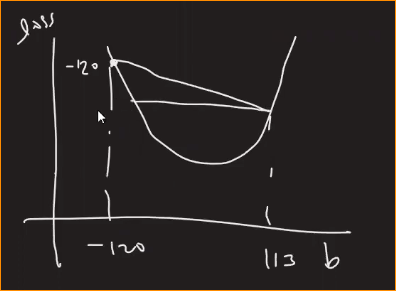

In [72]:
#lets descrese lr & increase epochs
gd = GRD(0.001, 100)
gd.fit(X,y)

-23850.000652227056 -96.14999934777295
-19080.000521781647 -77.06999882599129
-15264.000417425319 -61.80599840856597
-12211.200333940253 -49.594798074625714
-9768.960267152204 -39.82583780747351
-7815.16821372176 -32.01066959375175
-6252.134570977408 -25.758535022774343
-5001.707656781927 -20.756827365992415
-4001.366125425542 -16.755461240566873
-3201.0929003404335 -13.55436834022644
-2560.8743202723463 -10.993494019954092
-2048.6994562178766 -8.944794563736215
-1638.9595649743019 -7.305834998761913
-1311.1676519794414 -5.994667346782472
-1048.934121583553 -4.945733225198919
-839.1472972668423 -4.106585927932077
-671.3178378134741 -3.435268090118603
-537.0542702507794 -2.8982138198678236
-429.6434162006233 -2.4685704036672003
-343.71473296049874 -2.1248556707067014
-274.9717863683989 -1.8498838843383025
-219.9774290947193 -1.6299064552435834
-175.98194327577545 -1.453924511967808
-140.78555462062025 -1.3131389573471877
-112.62844369649619 -1.2005105136506915
-90.10275495719698 -1.1104

In [74]:
#diff b/w actual intercpt & my class intercept is:
(-0.98) - (-0.74)

-0.24

##Visualization based on above code

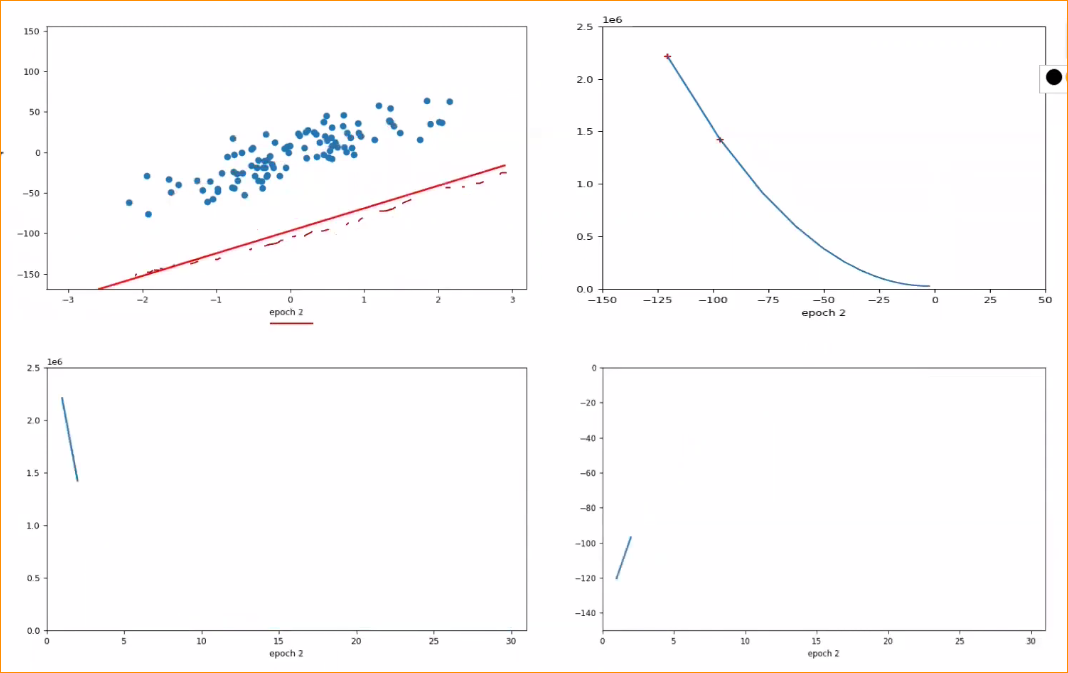

+ Red line which is the best fit ilne moves upwards closer towards the best fit line during epochs

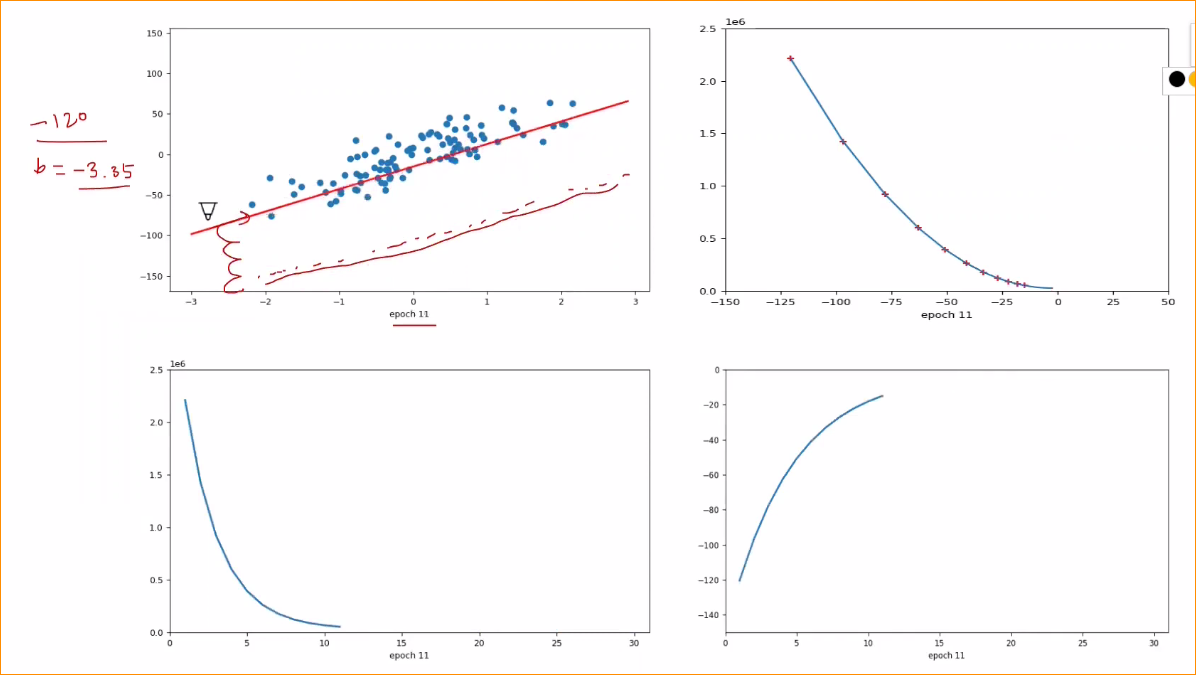

## Few Discussions

+ Effect of learning rate
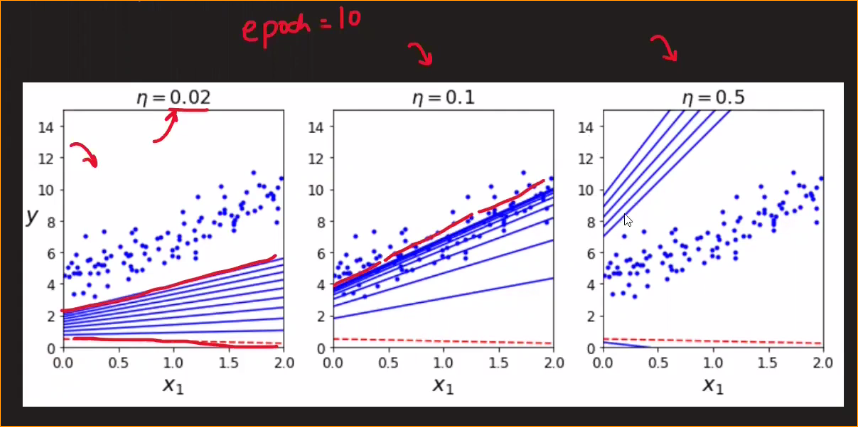

+ learning rate shouldnt be very small & not very big either, it should be optimum & it depends upon the data.

+ The universatality of gradient descent: it works with multiple algorithms

+ As we're deriving slope frm loss function, so loss function can be of any algorithm as long as it is diffrentiable

##Lets perform gradient descent using both m & b

+ initialize random values for both m & b, m = 1, b = 0
+ epochs = 100
+ lr = 0.01

+ for i in epochs:
      b -= lr * slope
      m -= lr * slope2

+ whats is slope2?
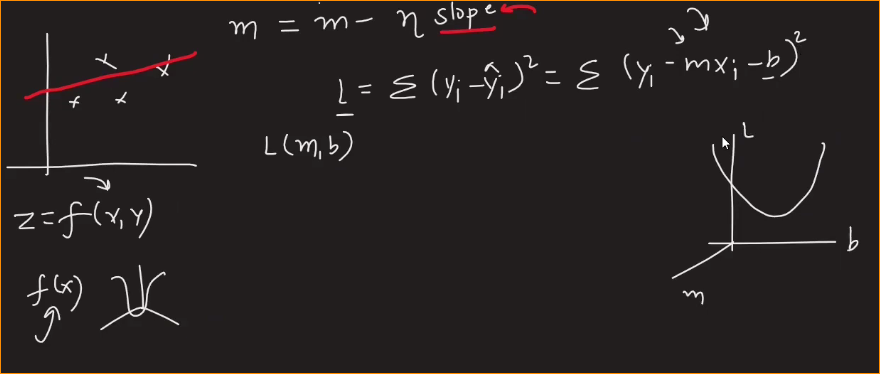      

+ earlire we were taking m constant & extracting value of b so it was a loss function of b

+ now since m&b both are not constant so it is a function of both:
l(m,b)

+ loss function with multiple columns will look like this:
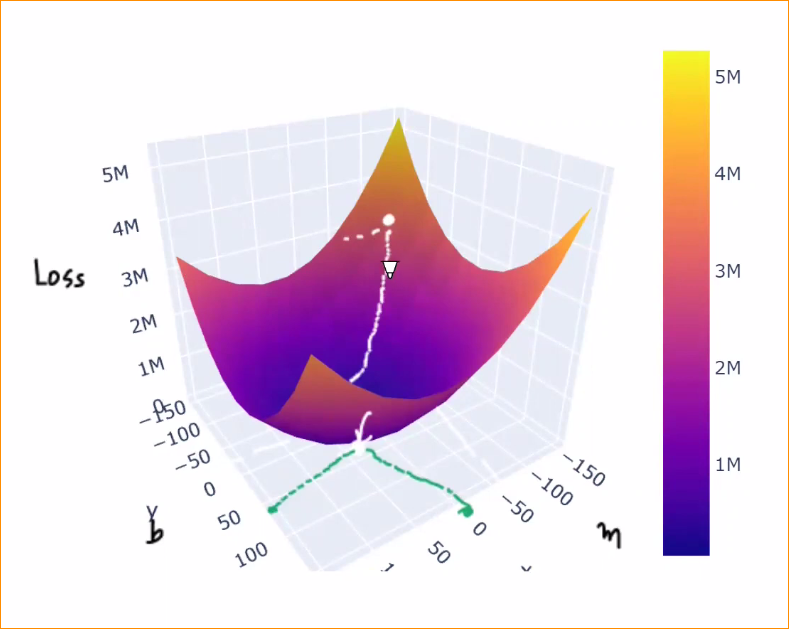

+ earlier we were calculating slope at point b, now we'll be calcuating slope at m & b meaning partial derivative with respect to m & b both

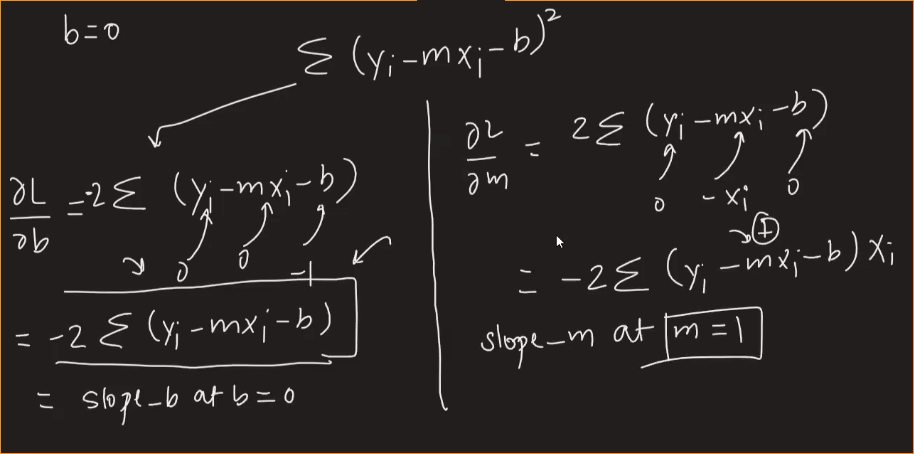

##lets modify the gradeintdescent class

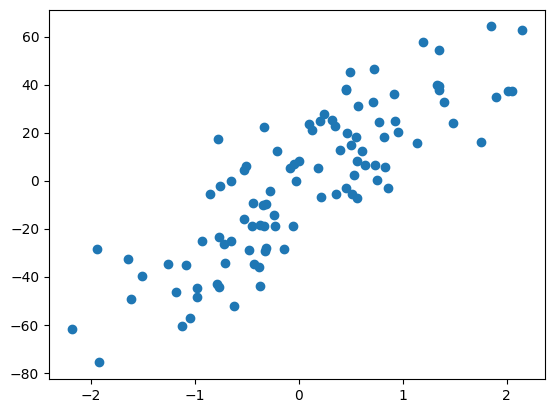

In [78]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)
plt.scatter(X,y)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coefficient (slope):", lr.coef_)
print("Intercept (y-intercept):", lr.intercept_)



y_pred = lr.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print("R-squared (test set):", r2_test)

Coefficient (slope): [28.16404017]
Intercept (y-intercept): -2.7130725669241036
R-squared (test set): 0.6186926408914155


In [100]:
class GRD_2:

  def __init__(self,learning_rate, epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
      loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b)*X.ravel())
      self.b -= self.lr * loss_slope_b
      self.m -= self.lr * loss_slope_m
    print(f"new values: {self.m},{self.b}")

  def predict(self,X):
    return self.m * X + self.b

In [101]:
gd = GRD_2(0.001, 100)
gd.fit(X,y)

new values: 27.828091872608653,-2.2947448944994893


In [102]:
#if you notice the value of m & b is coming out to be exactly the same

print(f"old values: {lr.coef_} {lr.intercept_}")
gd.fit(X,y)

old values: [28.16404017] -2.7130725669241036
new values: 27.828091032520142,-2.2947445586769826


In [103]:
gd.predict(X)

array([[-22.11921675],
       [-14.45967366],
       [-14.92180713],
       [ 24.22071242],
       [  4.32438502],
       [ 21.67112396],
       [ -9.06604965],
       [  2.85194818],
       [-22.35878911],
       [-14.25795969],
       [ 53.78500401],
       [  8.75972323],
       [  3.48793424],
       [ -8.76271288],
       [-23.68416726],
       [ 10.31579458],
       [ 15.5120049 ],
       [  7.71035289],
       [-47.24011599],
       [ 46.38331521],
       [-24.25080297],
       [-16.54175581],
       [-28.12854173],
       [ 57.54630841],
       [ -8.06489084],
       [-47.90758522],
       [-11.71784416],
       [-11.25883101],
       [-15.69039214],
       [-16.85340596],
       [ 17.79616478],
       [ 19.01909784],
       [ 10.32476711],
       [-37.40282965],
       [-63.15798748],
       [-35.28268709],
       [  3.75652002],
       [ 34.7254359 ],
       [-32.54893283],
       [ 13.35192538],
       [-44.39433614],
       [ -2.36122658],
       [-10.0346972 ],
       [ 10

In [104]:
y_pred = gd.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print("R-squared (test set):", r2_test)

R-squared (test set): 0.6213283002983347


In [105]:
#r2 score in both cases also coming out to be almost similar
#only benefit is OLS method doesnt works when yuo have multiple columns bcoz of time complexity
#whereas gradientdescent method works in multiple columns also

+ No matter where you start.. you'll end up very close to the correct answer:

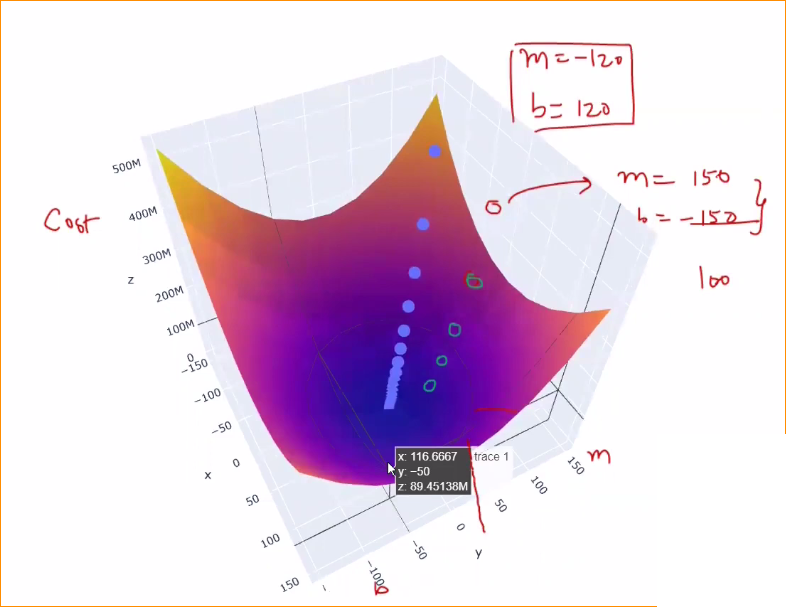

## Impact on gradient descent algorithm

+ learning rate: Its a hyper parameter, we can experiment with this value.. if its very small then it will take a lot of time & you'll have to increase epochs, If its very high then it will never reach the minimum,

+ loss function: if its a non-convex function which means line crosses above the function which means it will have more then 1 maxima & minima. In this case you might end up with local minima & never reach global minima. Mostly the case in deep learning but very rare in ml.

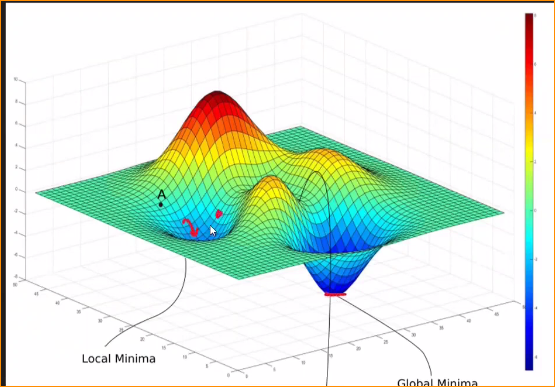

+ saddle point also brings a challenge bcoz then it moves towards the minima very very slowly & you'll have to increase epochs, more epochs with big data will take a lot of time & lot of resources

+ data: if data is in same scale then it will converge quickly but if its not then it will take time to converge & thats why we have to bring data in similar scale before applying lr